#### OUTLINE.

            1. INTRODUCTION TO DIMENSIONALITY REDUCTION: FROM MATHEMATIC IDEAS TO ALGORITHM
            
            2. IMPORTANCE OF THE FEATURE SCALING IN "PCA"
            
            3. APPLICATION EXAMPLES
            
            4. SOMETHING ABOUT THE ASYMPTOTIC PROPERTIES OF THE PRINCIPLE COMPONENT

## 1. INTRODUCTION TO DIMENSIONALITY REDUCTION: 

### 1.1. Motivation from the `"Curse of Dimensionality"` 

- Theoretically, we will `lose information` because *`the resulting lower dimensional data points are less distinguishable than the original higher dimensional ones`*. See the image in the link below
https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/image_illustration/pca.JPG

- Unfortunaly, in practice, the `real-dataset` (such as `mnist`) often deal with very **high dimensional** datapoints which pose fundamental dificulties for data analysis. Number of training examples required increases exponentially with dimensionality.

### 1.2. `Dimensionality Reduction` as a `"solution"`

- A general idea for how to avoid problems with high dimensionaldata is to reduce their dimensionality prior to analysis, by ***`projecting the linear combination of data-point`*** $\sum_{j=1}^d \delta_j \textbf{x}_j$ onto a lower dimensional space (then the data can be represented by fewer features).

-  In a really high dimensional settings, it is of course `"not at all clear which and how many dimensions of our data to ignore?"`

- However, we can prove mathematically that, among all techniques based on `linear projections`, then `principal component analysisis (PCA)` is the best `preserves information`. 

- Along with `dimensionality reduction`; the `Kmean clustering` and `FA (factor analysis)` also can be understoodas a form of `data compression`.

Ref (KMeans): https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/KMeans(basic%20level).ipynb

--------------------------

#### Mathematic idea.
Suppose that we have $N$ observations with a dataset $\textbf{X} = \left[ \begin{array}{c} \textbf{x}_1 \\ \vdots \\ \textbf{x}_d \end{array} \right] ,$ with $d$ be a `(large) number` of features, we want to reduce to $D$ dimension with $D < d$ (where $D$ is the number of `PC or principle component`).

#### P.C.A 's idea from the weight vector.

Let the `weight vector` $\delta = \left( \delta_1, \ldots, \delta_d \right)^T$, a new `PC` now becomes $\delta^T \textbf{X}$; and one aim is to maximize the variance of the projection $\delta^T \textbf{X}$; that is

$$ \underset{\delta\textbf{x}}{\max}\text{Var}\left(\delta\textbf{X}\right)=\underset{\delta\textbf{x}}{\max}\delta^{T}\Sigma \delta $$

where $\Sigma = \text{Var} \textbf{X}$, and if we add the condition $\delta$ be a `standardized vector`, then we obtain the `Standardized linear combination (SLC)` problem:

$$ \left\lbrace \begin{array}{ccl} \left( P \right)	&:& \delta = \underset{\delta}{\text{argmax}} \left( \delta^{T}\Sigma\delta \right) \\ \text{s.t}	&:& \Vert\delta\Vert^{2}=1 \end{array} \right. $$

In addition; suppose that $\textbf{X}$ has `zero-mean`, so its variances can be estimated by $\textbf{X}^T \textbf{X}$, then the Largrange multiplier now becomes:

$$ \mathcal{L} \left( \lambda , \delta \right) = \delta \textbf{X}^T \textbf{X} \delta + \lambda \left( 1 - \Vert \delta \Vert^2 \right) $$

and we found that $\lambda^{*}$ must be the `maximum value of the eignvalue` and $\delta^{*}$ is its eign-vector. Hence, the ﬁrst principal component `(PC1)` is $\textbf{y}_1 = \gamma_1^T \textbf{X}$, likewise the second `(PC2)` be $\textbf{y}_2 = \gamma_2^T \textbf{X}$, .... where $\left( \gamma_k \right)$ be the eign-vectors of $\Sigma$ satisfies $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_d$.

Noting that if $\textbf{X}$ has `non-zero mean`, to get the `PC` with `zero-mean`, then 

$$\textbf{Y} = \Gamma^T \left( \textbf{X} - \mu_{\textbf{X}} \right).$$

**Properties.**
  $\mathbb{E} \textbf{Y} = \textbf{0}$ and $\text{Var} \textbf{Y} =$ $\left( \begin{array}{cccc} \lambda_1 & 0 & \ldots & 0 \\ 0 & \lambda_2 & \ldots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \ldots & \lambda_d \end{array} \right)$



**In `scikit-learn` for `PCA`, we use `SVD algorithm`.**

***`SVD (Single Value Decomposition)` is a matrix factorization method normally used for `PCA`*** and `SVD` does not require a square data set. 

https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/image_illustration/svd.png

#### SVD and apply `SVD to PCA`
`SVD` states that any matrix $\textbf{A}$ can be factorized as:

$$ \textbf{A} = \textbf{U S W}^T $$

where $U$ and $W$ are orthogonal matrices with orthonormal eigenvectors chosen from $AA^T$ and $A^T A$ respectively; $S$ is a diagonal matrix with r elements equal to the root of the positive eigenvalues of $AA^T$ or $A^T A$.

**Factorization tricks.** 
- Let $\textbf{U} = \left[ \textbf{U}_D, \overline{\textbf{U}_D} \right]$ where $\textbf{U}_D$ be the first $D$ columns of $\textbf{U}$ and $\overline{\textbf{U}_D}$ be the last $d - D$ columns of $\textbf{U}$.
- In the new basis $\textbf{SW}^T$, do the samething where $\textbf{Y}$ be the first $D$ rows of $\textbf{SW}^T$, and $\textbf{Z}$ for the remaining of $\textbf{SW}^T$ after removing $\textbf{Y}$
- The `PCA purpose` here is finding the orthogonal matrix $\textbf{U}$ to keep almost information on the $\textbf{U}_D \textbf{Z}$

Hence, the matrix of dataset will become

$$ \textbf{X} = \textbf{U}_D \textbf{Y} + \overline{\textbf{U}}_D \textbf{Z} $$

 and we can estimate $\textbf{X}$ by $$\tilde{\textbf{X}} = \textbf{U}_D \textbf{Y} + \overline{\textbf{U}}_D \textbf{Z} \mu_X \textbf{1}^T .$$

so the `loss function` now defined by

$$ \mathcal{L}=N^{-1}\left\Vert \textbf{X}-\tilde{\textbf{X}}\right\Vert ^{2}=N^{-1}\text{trace}\left[\left(\textbf{X}-\tilde{\textbf{X}}\right)^{T}\left(\textbf{X}-\tilde{\textbf{X}}\right)\right]=N^{-1}\left\Vert \overline{\textbf{U}_{D}}^{T}\left(\textbf{X}-\mu_{X}\textbf{1}\right)^{T}\right\Vert  $$

By letting $\widehat{\textbf{X}}=\left(\textbf{X}-\mu_{X}\textbf{1}\right)^{T}$ be a `zero-corrected data`, we obtain

$$ \mathcal{L}=N^{-1} \left \Vert \overline{\textbf{U}_{D}}^{T}\widehat{\textbf{X}}\right\Vert _{F}^{2}=N^{-1}\left\Vert \widehat{\textbf{X}}^{T}\overline{\textbf{U}_{D}}\right\Vert _{F}^{2}={\displaystyle N^{-1}\sum_{k=D+1}^{d}\left\Vert \widehat{\textbf{X}}^{T}\overline{\textbf{u}_{k}} \right \Vert _{2}^{2} = \sum_{k=D+1}^{d} \textbf{u}_{k}^{T} \textbf{S} \textbf{u}_{k}}, $$
where $\textbf{S} = N^{-1} \widehat{\textbf{X}}^T \widehat{\textbf{X}}$ be the `empirical covariance matrix` of the `zero-corrected data` $\widehat{\textbf{X}}$.

Observe that,
$$ \mathcal{R}=\sum_{k=1}^{d}\textbf{u}_{k}^{T}\textbf{S}\textbf{u}_{k}=N^{-1}\left \Vert \widehat{\textbf{X}}^{T} \textbf{U} \right \Vert _{F}^{2} = N^{-1} \text{trace} \left( \widehat{\textbf{X}}^{T} \widehat{\textbf{X}} \right) = \text{trace} \left( \textbf{S} \right) $$

Noting that minimizing the `loss function` $\mathcal{L}$ is equivalent to maximizing the difference
$$ \mathcal{R} - \mathcal{L} = \sum_{k=1}^{D} \textbf{u}_{k}^{T} \textbf{S} \textbf{u}_{k} = \sum_{k=1}^D \lambda_k $$

the last equality occurs if $\textbf{u}_k$ be the `orthonormal vector` satisfies $\Vert \textbf{u}_k \Vert_2^2 = 1, \quad \forall k = 1, \ldots, D.$

#### `P.C.A. algorithm.`
- Step 1. Calculate the `zero-corrected data` $\widehat{\textbf{X}} = \left(\textbf{X}-\mu_{X}\textbf{1}\right)^{T}$.
- Step 2. Find the `empirical covariance matrix` $\textbf{S} = N^{-1} \widehat{\textbf{X}}^T \widehat{\textbf{X}}$
- Step 3. Calculate the `eign-values` $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_d$ and `eign-vectors` $\textbf{u}_1, \ldots, \textbf{u}_d$ as the `orthonormal vectors`.
- Step 4. Select the first $D$ eignvectors as $D$ `principle components`;
$$ \textbf{Z} = \textbf{U}_{D}^T \widehat{\textbf{X}} $$

**Warming-up example. `"Breast Cancer Data Exploration"`**

Firstly, viewing the dataset

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
X = breast.data
labels = breast.target
labels = np.reshape(labels, (-1,1))
X.shape, labels.shape

((569, 30), (569, 1))

The data has 569 samples with thirty features, and each sample has a label associated with it. There are two labels in this dataset.

**insight dataset**

In [2]:
import pandas as pd

features = list(breast.feature_names)
data_breast = np.concatenate([X, labels], axis=1)
df_breast = pd.DataFrame(data_breast, columns = np.append(features, 'labels'))
df_breast.labels = df_breast.labels.replace({1: 'benign', 0: 'malignant'})
df_breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


Using the sklearn library to import the PCA module, and in the PCA method, you will pass the number of components; first; try will full dimension to explore the variance_ratio

In [3]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
pca.n_components_

30

This meant the default value in `PCA()` without `n_components` will return the full-dimension with the whole 30 features

**The amount of information or variance the principal components hold.**

            Var(y1), Var(y2), ...., Var(yd)

In [4]:
pc_var = pca.explained_variance_ratio_
pc_var

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

**Eign-values**

In [5]:
eign_val = pca.explained_variance_
eign_val

array([4.43782605e+05, 7.31010006e+03, 7.03833742e+02, 5.46487379e+01,
       3.98900178e+01, 3.00458768e+00, 1.81533030e+00, 3.71466740e-01,
       1.55513547e-01, 8.40612196e-02, 3.16089533e-02, 7.49736514e-03,
       3.16165652e-03, 2.16150395e-03, 1.32653879e-03, 6.40269304e-04,
       3.74883320e-04, 2.35169626e-04, 1.84583467e-04, 1.64180064e-04,
       7.81102011e-05, 5.76111660e-05, 3.49172775e-05, 2.83952689e-05,
       1.61463677e-05, 1.24902419e-05, 3.68048171e-06, 2.84790425e-06,
       2.00491564e-06, 7.01997261e-07])

***compare the proportion_each_PCs-variance_ratios***

In [6]:
eign_val / eign_val.sum()

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

Hence, the `pca.explained_variance_ratio_ = pca.explained_variance_/ sum(pca.explained_variance_)`

**Explore the `eign-vectors`**

In [32]:
eign_vectors = pca.components_
eign_vect1 = eign_vectors[0]
eign_vect1

array([ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,  5.16826469e-01,
        4.23694535e-06,  4.05260047e-05,  8.19399539e-05,  4.77807775e-05,
        7.07804332e-06, -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
        2.23634150e-03,  5.57271669e-02, -8.05646029e-07,  5.51918197e-06,
        8.87094462e-06,  3.27915009e-06, -1.24101836e-06, -8.54530832e-08,
        7.15473257e-03,  3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
        6.42005481e-06,  1.01275937e-04,  1.68928625e-04,  7.36658178e-05,
        1.78986262e-05,  1.61356159e-06])

**Covariance with the generative model.**

                                        cov = components_.T * S**2 * components_  
        
where `S**2` contains the `explained_variance`

In [11]:
cov = pca.get_covariance()
cov[0]

array([ 1.24189201e+01,  4.90758156e+00,  8.54471417e+01,  1.22448341e+03,
        8.45445983e-03,  9.41970568e-02,  1.90127582e-01,  1.12475116e-01,
        1.42731729e-02, -7.75370629e-03,  6.63650325e-01, -1.89188600e-01,
        4.80354973e+00,  1.17968162e+02, -2.35533633e-03,  1.30005142e-02,
        2.06588280e-02,  8.17956306e-03, -3.03898170e-03, -3.97624858e-04,
        1.65137495e+01,  6.43310002e+00,  1.14288570e+02,  1.88822722e+03,
        9.62462515e-03,  2.29249204e-01,  3.87386440e-01,  1.72392739e-01,
        3.57457580e-02,  4.49735060e-04])

Explore the **`principle components`**

For example; the first `PC` will be calculated by 2 methods

**Method 1:**  $$ Y_1 = \gamma^T \left( \textbf{X} - \textbf{X}_{\text{mean}} \right) $$

**Method 2:** Use `pca.transform(input_data)` and select the first columns

In [28]:
PC1_use_dot = np.dot(pca.components_[0], (X - X.mean(axis=0)).T)
PC1_use_skl = pca.transform(X)[:, 0]
compare_PC1 = pd.DataFrame({"PC1 in method1": PC1_use_dot, "PC1 in method2":PC1_use_skl})
compare_PC1.head(10)

,PC1 in method1,PC1 in method2
0,1160.142574,1160.142574
1,1269.122443,1269.122443
2,995.793889,995.793889
3,-407.180803,-407.180803
4,930.341180,930.341180
5,-211.591259,-211.591259
6,821.210900,821.210900
7,-25.089978,-25.089978
8,-191.292834,-191.292834
9,-238.292863,-238.292863


**Compare the total differences between 2 methods**

In [31]:
np.mean((np.array(PC1_use_dot) - np.array(PC1_use_skl))**2)

6.145915214585062e-86

Hence, the difference is `too small enough < 1e-12`; so we can use `pca.transform()` to determine the `PC` for convenient.

The **`singular_values_`** corresponding to each of the selected components. The `singular values` are equal to the `2-norms` $\Vert . \Vert_2$ of the n_components variables in the lower-dimensional space.

In [35]:
Lambda = pca.singular_values_
Lambda

array([1.58766659e+04, 2.03767928e+03, 6.32279658e+02, 1.76183095e+02,
       1.50524184e+02, 4.13110857e+01, 3.21108643e+01, 1.45256018e+01,
       9.39849429e+00, 6.90990396e+00, 4.23720255e+00, 2.06361416e+00,
       1.34008242e+00, 1.10803170e+00, 8.68028820e-01, 6.03053036e-01,
       4.61447425e-01, 3.65480981e-01, 3.23795320e-01, 3.05375632e-01,
       2.10633792e-01, 1.80895390e-01, 1.40829733e-01, 1.26998082e-01,
       9.57660526e-02, 8.42286020e-02, 4.57221348e-02, 4.02195178e-02,
       3.37459936e-02, 1.99683360e-02])

**Now, using PCA with the `explained_cummulative_variance`** at least `0.992` and `0.999` respectively

In [11]:
pca2 = PCA(0.992).fit(X)
pca3 = PCA(0.999).fit(X)
pca2.n_components_, pca3.n_components_

(2, 3)

These explained that for only 2 components, we can get the `explained_cumulative_variance` at least `0.992` and the `3 first components` give `0.999` at least.

Check again by the next 2 following lines;

In [13]:
pc_var[:2].sum()/ pc_var.sum()

0.9982211613741726

In [9]:
lambdas[:3].sum()/ lambdas.sum()

0.9997786721191878

**Example 1. Using PCA and LogisticRegression to predict the target with `n_components = 2`.**

Ref (logistic regression): https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Logistic%20regression.ipynb

In [15]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

singular values

In [126]:
pca.singular_values_

array([15876.66588813,  2037.67927678])

**The amount of information or variance the 2 first principal components hold.**

In [58]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

Compare to the 2 first values in `line 9`, this is the 2 highest `explained_variance`

Next, call `fit_transform` on the aggregate data. Here, several components represent the lower dimension in which you will project your higher dimension data.

In [130]:
Z = pca.transform(X)
pca_breast = pd.DataFrame(Z, columns = ['PC1', 'PC2'])  ## that meant PC1 = Z[:, 0] and PC2 = Z[:, 1]
pca_breast['labels'] = df_breast.labels
pca_breast.head()

,PC1,PC2,labels
0,1160.142574,-293.917544,malignant
1,1269.122443,15.630182,malignant
2,995.793889,39.156743,malignant
3,-407.180803,-67.380320,malignant
4,930.341180,189.340742,malignant


Display the scatterplot of the 2 first components (without scaling the original dataset)

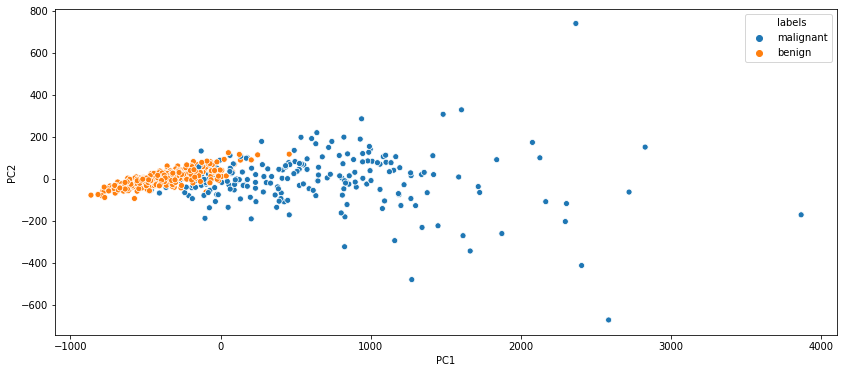

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
_ = plt.figure(figsize = (14, 6))
_ = sns.scatterplot(x="PC1", y= "PC2", hue = "labels", data = pca_breast)

**Prediction dataset after finding the PC by using Logistic regression**

In [142]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e-3)
logreg.fit(Z, breast.target)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
from sklearn.metrics import accuracy_score

pred = logreg.predict(Z)
print("accuracy_score :", accuracy_score(breast.target, pred)) 

0.9332161687170475

## 2. IMPORTANCE OF THE FEATURE SCALING IN "PCA"

`PCA` and `SVD` seek to find the vectors that capture the `most variance`; variance is sensitive to axis scale

To prove that; firstly, we will apply the `StandardScaler` to the original dataset `X` before using `PCA` to find the `Principle components (PCs)`

Reminder that; for `StandardScaler`

$$ x_{\text{new}} = \dfrac{x - x_{\text{mean}} }{ x_{\text{std}} } $$

where $x_{\text{mean}}$ and $x_{\text{std}}$ be the `mean` and `standard deviation` values of the original dataset, respectively.

In [147]:
from sklearn.preprocessing import StandardScaler
x_scale = StandardScaler().fit_transform(X)
pca_scale = PCA(n_components = 2)
pca_scale.fit(x_scale)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

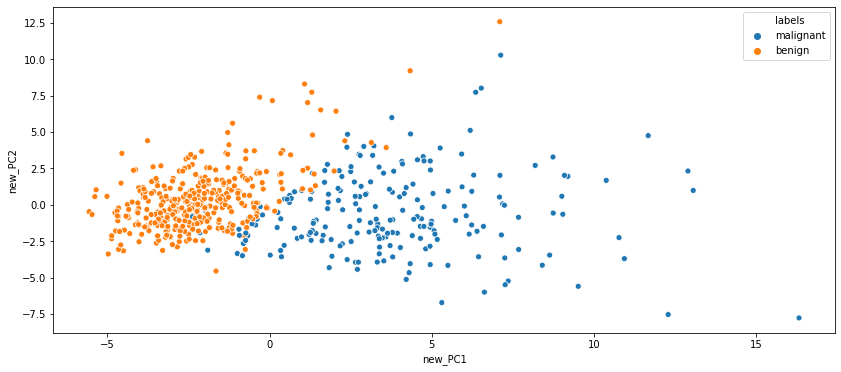

In [152]:
Z_scale = pca_scale.transform(x_scale)

new_pca_breast = pd.DataFrame(Z_scale, columns = ['new_PC1', 'new_PC2'])
new_pca_breast['labels'] = df_breast.labels

_ = plt.figure(figsize = (14, 6))
_ = sns.scatterplot(x="new_PC1", y= "new_PC2", hue = "labels", data = new_pca_breast)

Now, we can see the scatterplot better when using `StandarScaler`; 
- Before: the ranges of `x_axis` is in [-1000, 4000] while `y_axis` is in [-650, 800]
- Now : the `x_axis` is in [-3.5, 16.5] and `y_axis` is in [-7.5, 12.5]

This demonstrates for the point `"Variance is sensitive to axis scale"` 

In [150]:
logreg = LogisticRegression(C=1e-3)
logreg.fit(Z_scale, breast.target)
new_pred = logreg.predict(Z_scale)
print("accuracy_score :", accuracy_score(breast.target, new_pred))

0.9363093145869947

Now; what if we use another scale; such as `MinMaxScaler`

$$ x_{\text{new}} = \dfrac{x - x_{\min}}{x_{\max}} $$

Of course, the `x_new (X_MMS)`'s values be in $[0,1]$; but the values of the `PCs` is not.

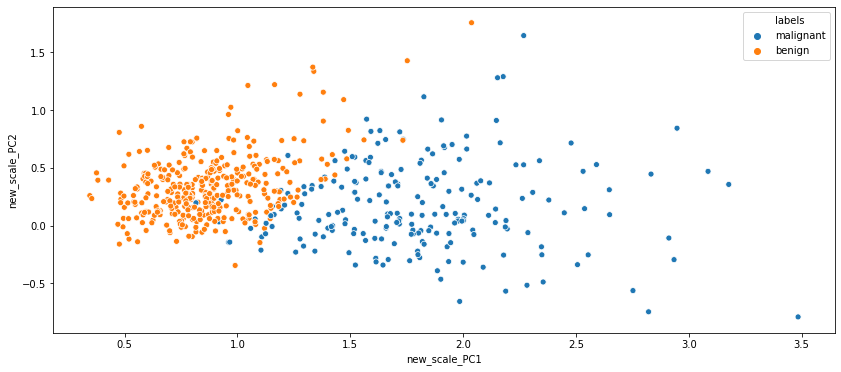

In [157]:
from sklearn.preprocessing import MinMaxScaler

X_MMS = MinMaxScaler().fit_transform(X)
pca_MMS = PCA(n_components = 2)
pca_MMS.fit(X_MMS)

Z_MMS = pca_scale.transform(X_MMS)

new_scale_pca_breast = pd.DataFrame(Z_MMS, columns = ['new_scale_PC1', 'new_scale_PC2'])
new_scale_pca_breast['labels'] = df_breast.labels

_ = plt.figure(figsize = (14, 6))
_ = sns.scatterplot(x="new_scale_PC1", y= "new_scale_PC2", hue = "labels", data = new_scale_pca_breast)

Now, verify the accuracy_score in this case

In [161]:
logreg = LogisticRegression(C=1e-3)
logreg.fit(Z_MMS, breast.target)
new_scale_pred = logreg.predict(Z_MMS)
print("accuracy_score :", accuracy_score(breast.target, new_scale_pred))

0.7774165202108964

**Comments**
- Depends on the type of `scaler`, the `accuracy_score` will be better or not.
- The `scatter plot` of the `PCs` will explain clearer when scaling the dataset then apply `PCA`
- Noting that in these preceding example; we did not using the `train_test_split` to seperate the dataset into `train-set` and `test set`! In the remaining of this file; we will use `train_test_split` to evaluate the `score` at each set.

## 3. Application examples

**Example 2. MNIST dataset.**

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


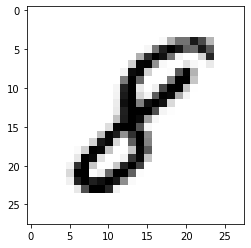

In [3]:
import matplotlib.pyplot as plt

image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_train.max()

255

In this example; I use `MinMaxScaler`; Noting that to using `StandarScaler`; we state:

            scaler = StandardScaler()

            scaler.fit(x_train.reshape(60000, -1))

            train_img = scaler.transform(x_train.reshape(x_train.shape[0], -1))

            test_img = scaler.transform(x_test.reshape(x_test.shape[0], -1))

In [6]:
x_train.shape

(60000, 28, 28)

The input data is 3D array; we must reshape to 2D but keep the first dimension (the numbers of the observations).

In [7]:
from sklearn.preprocessing import MinMaxScaler

train_img = x_train.reshape(x_train.shape[0], -1)
test_img = x_test.reshape(x_test.shape[0], -1)

scaler = MinMaxScaler()

scaler = scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [8]:
train_img.min(), train_img.max() 

(0.0, 1.0)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(train_img)
pca.n_components_

154

When we use `pca = PCA(0.95)`; this meant : `"To get the explained_variance = 0.95; we must reduce the dimension from 28x28 to 154."`

In [11]:
pca_train_img = pca.transform(train_img)
pca_test_img = pca.transform(test_img)

train_img.shape, test_img.shape

((60000, 784), (10000, 784))

In [12]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C=1e-3)
logisticRegr.fit(pca_train_img, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predict for one Observation (image)** the return value is the class of prediction; here is 7

In [13]:
logisticRegr.predict(pca_test_img[0].reshape(1,-1))

array([7], dtype=uint8)

**Calculate the `acc_score` in this case**

In [15]:
logisticRegr.score(pca_test_img, y_test)

0.9002

**using SVM**

Ref (SVM): https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/SVM.ipynb

In [18]:
from sklearn.svm import SVC
from time import time

In [21]:
clf = SVC(kernel='linear')
t0 = time()
clf = clf.fit(pca_train_img, y_train)
print("done in %0.3fs" % (time() - t0))

done in 108.232s


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(pca_test_img)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Predicting people's names on the test set
done in 14.077s
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.92      0.93      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.92      0.90      0.91       892
           6       0.96      0.96      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.93      0.92      0.92       974
           9       0.95      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

[[ 963    0    3    2    1    5    4    0    1    1]
 [   0 1122    3    2    0    1    0    2    5    0]
 [   7    3  973    9    5    2    8    8   16    1]
 [   1    2   16  941   

Look at the `f1-score` at `accuaracy`; the `test_accuracy` using `SVM` is about `0.94`; which is better than using `LogisticRegression`

**Example 3. Face detection using SVM and PCA**

In [25]:
from time import time
import logging
from sklearn.datasets import fetch_lfw_people

from time import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Load the dataset

In [26]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

Fit the model

In [27]:
from sklearn.model_selection import train_test_split

n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.070s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.016s
Fitting the classifier to the training set
done in 28.799s
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.047s
                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.46      0.55        13
     Colin Powell       0.79      0.87      0.83        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       0.88

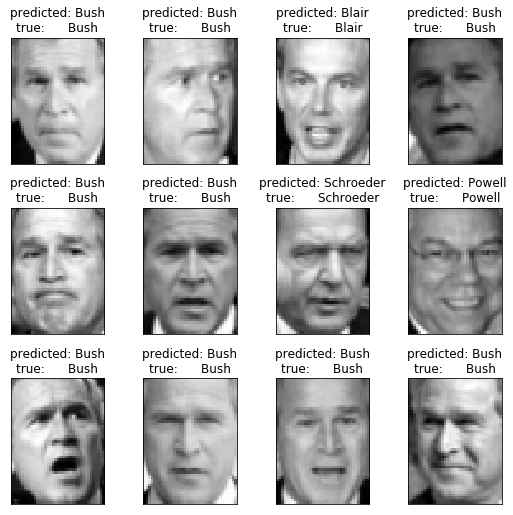

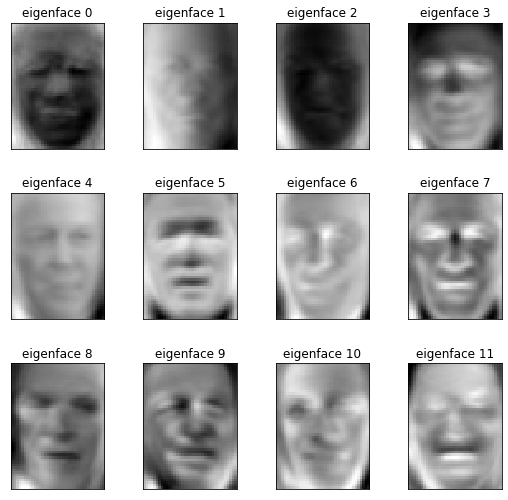

In [28]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

**Example 5. Cifar 10** The `CIFAR-10` dataset consists of `60000` of the `32×32` colour images in 10 classes, with `6000` images per class. There are `50000` training images and `10000` test images.

Recognizing photos from the cifar-10 collection is one of the most common problems in the today’s world of machine learning. 

Firsly, use the `.load_data()` method to download the data, it will download and store the data in your `Keras directory`. This can take some time based on your internet speed.

In [133]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

verify the shape

In [37]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)
y_train.shape,y_test.shape

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


((50000, 1), (10000, 1))

Find out the total number of labels and the various kinds of classes the data has.

In [38]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


**Display the CIFAR-10 images** and create a `dictionary` that will have class names with their corresponding `categorical class labels`.

In [39]:
import matplotlib.pyplot as plt

label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')
Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')
Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')
Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')
Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


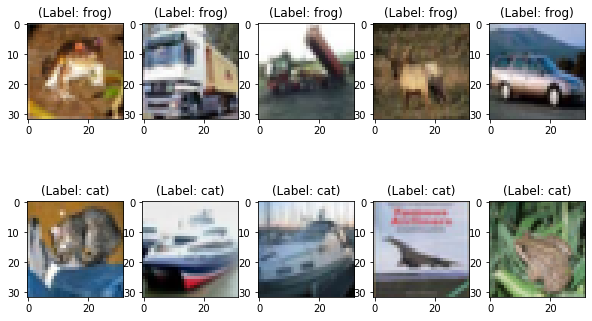

In [40]:
plt.figure(figsize=[10, 6])

# Display the 3 first images in training data  (5 top images)
for k in range(5):
    plt.subplot(2, 5, k+1)
    curr_img = np.reshape(x_train[k], (32,32,3))
    plt.imshow(curr_img)
    print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

    # Display the first 5 images in testing data
    plt.subplot(2, 5, k+6)
    curr_img = np.reshape(x_test[k],(32,32,3))
    plt.imshow(curr_img)
    print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In this dataset (data of pixels); the values of this pixels is scaled in [0, 255]; so we must changed the pixel to [0, 1] before using `StandardScaler`

Let's quickly check the maximum and minimum values of the CIFAR-10 training images and normalize the pixels between 0 and 1 inclusive.

In [44]:
np.min(x_train), np.mean(x_train), np.max(x_train)

(0.0, 0.4733630004850874, 1.0)

In [45]:
x_train = x_train/255.
x_train.shape

(50000, 32, 32, 3)

Reshape the image dimensions by flatten the images

In [46]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.000907,0.000953,0.000969,0.000661,0.000707,0.000692,0.000769,0.000738,0.000661,0.001046,...,0.003322,0.002830,0.002153,0.002322,0.001815,0.001292,0.001892,0.001415,0.001107,6
1,0.002368,0.002722,0.002876,0.001938,0.002107,0.002092,0.001615,0.001599,0.001461,0.001569,...,0.002199,0.002045,0.002138,0.002199,0.002061,0.002184,0.002199,0.002045,0.002215,9
2,0.003922,0.003922,0.003922,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,...,0.001200,0.001307,0.001276,0.001215,0.001307,0.001276,0.001230,0.001323,0.001292,9
3,0.000431,0.000384,0.000154,0.000569,0.000523,0.000292,0.000584,0.000538,0.000308,0.000646,...,0.000830,0.000723,0.000431,0.000969,0.000861,0.000569,0.001107,0.001000,0.000707,4
4,0.002614,0.002768,0.003045,0.002584,0.002737,0.003014,0.002722,0.002845,0.003122,0.002814,...,0.001153,0.001215,0.001261,0.001092,0.001153,0.001200,0.001123,0.001184,0.001230,1


In [47]:
df_cifar.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,0.002010,0.002092,0.002039,0.002001,0.002083,0.002028,0.002015,0.002095,0.002039,0.002023,...,0.001950,0.001933,0.001751,0.001946,0.001932,0.001752,0.001948,0.001935,0.001759,4.50000
std,0.001129,0.001121,0.001237,0.001114,0.001106,0.001224,0.001111,0.001102,0.001222,0.001108,...,0.000984,0.000947,0.000998,0.000987,0.000951,0.001003,0.000998,0.000963,0.001016,2.87231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.001092,0.001184,0.000938,0.001092,0.001200,0.000938,0.001123,0.001215,0.000953,0.001123,...,0.001215,0.001246,0.000984,0.001215,0.001246,0.000984,0.001200,0.001230,0.000969,2.00000
50%,0.001968,0.002076,0.001953,0.001953,0.002076,0.001953,0.001984,0.002092,0.001968,0.001999,...,0.001907,0.001892,0.001630,0.001907,0.001892,0.001630,0.001907,0.001892,0.001630,4.50000
75%,0.002907,0.002999,0.003183,0.002891,0.002968,0.003168,0.002891,0.002983,0.003168,0.002891,...,0.002645,0.002568,0.002414,0.002645,0.002568,0.002414,0.002645,0.002584,0.002430,7.00000
max,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,9.00000


Create the PCA method and pass the number of components as two and apply fit_transform on the training data, this can take few seconds since there are 50,000 samples

In [48]:
from sklearn.decomposition import PCA
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

Convert the principal components for each of the 50,000 images from a numpy array to a pandas DataFrame.

In [49]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-0.025102,0.010702,6
1,0.003254,-0.003725,9
2,0.030315,-0.045185,9
3,-0.040580,0.000042,4
4,-0.010297,-0.019487,1


**Display the scatterplot**

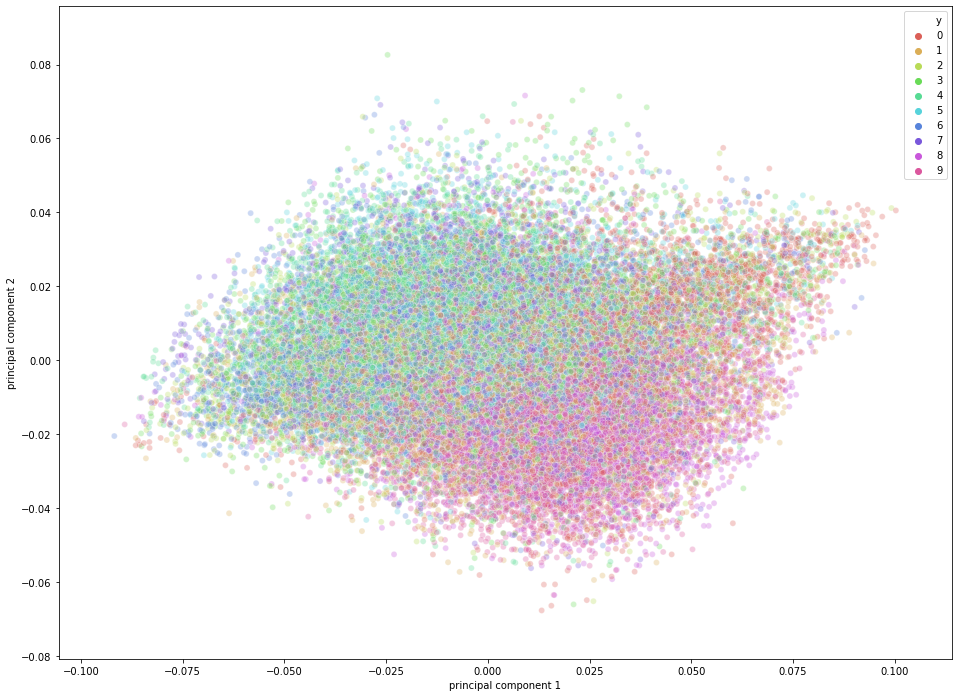

In [50]:
import seaborn as sns
plt.figure(figsize=(16, 12))
sns.scatterplot(
                x = "principal component 1", y = "principal component 2",
                hue = "y",
                palette = sns.color_palette("hls", 10),
                data=principal_cifar_Df,
                legend = "full",
                alpha = 0.3
)

Observe that some variation was captured by the principal components since there is some structure in the points when projected along the two principal component axis. The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other

Finally, calculate the `acc_score` by using `SVM`

In [51]:
from sklearn.svm import SVC
from time import time

pca = PCA(0.95)
pca.fit(df_cifar.iloc[:,:-1])
pca_train_img = pca.transform(df_cifar.iloc[:,:-1])

x_test = x_test/255
pca_test_img = pca.transform(x_test.reshape(x_test.shape[0], -1))

clf = SVC(kernel='linear')

t0 = time()
clf = clf.fit(pca_train_img, y_train.ravel())

print("done in %0.3fs" % (time() - t0))

pred_train = clf.predict(pca_train_img)
pred_test = clf.predict(pca_test_img)

done in 1147.707s


In [56]:
print("n_components to get 95% explained_variances = ", pca.n_components_)

n_components to get 95% explained_variances =  206


From the above output, we can observe that to achieve `95% variance`, the dimension was reduced to `206 principal components` from the actual 3072 dimensions.

In [57]:
from sklearn.metrics import accuracy_score

print("training accuracy_score :", accuracy_score(y_train.ravel(), pred_train))
print("testing accuracy_score :", accuracy_score(y_test.ravel(), pred_test))

training accuracy_score : 0.66208
testing accuracy_score : 0.4793


Moreover, the model did a decent job on the `training data`, achieving `66.2% accuracy` while it achieved only `47.93% accuracy on the test data`. This means that it **`overfitted`** the training data. However, remember that the data was projected to `206` dimensions from `3072` dimensions and despite that it did a great job!

To solve this `overtting`; I suggest using `LSTM` and `dropout`; we will discuss this in another file in `Kaggle project` of my github

## 4. Something about the asymptotic properties of `PCs`

Ref: Hardel; chapter 9.

**Remark 1.** For each $j \in 1, \ldots, d$; we denote:
- $\lambda_j$ is the eign-values of the `theoretical covariance matrix` $\Sigma$ and $\ell_j$ is the is the eign-values of the `empirical covariance matrix` $\textbf{S} = N^{-1} \widehat{\textbf{X}}^T \widehat{\textbf{X}}$; corresponding to the `j-PCs`. 
- $\gamma_j$ is the `eign-vectors` of `theoretical covariance matrix` and $g_j$ be the `eign-vectors` of the `empirical covariance matrix` which corresponding to the `j-PCs`.
- $\Sigma$ and $\textbf{S}$ have the **`spectral decompositions`** as
$$ \Sigma = \Gamma \Lambda \Gamma^T, \text{ and } \textbf{S} = \mathcal{G} L \mathcal{G}^T $$
where $\Lambda$ and $L$ be the `diagonal matrix` of the eign-values of $\Sigma$ and $\textbf{S},$ respectively.

Then, we have

$1.$ $\mathbb{E} \left( \ell_j \right) = \lambda_j,$ and $\text{Var} \left( \ell_j \right) = \lambda_j^2$

$2.$ $N \textbf{S} \sim \mathcal{W}_d \left( \Sigma, N - 1 \right)$ where $\mathcal{W}$ denoted the `wishart distribution`

$3.$ $\sqrt{N-1} \left( \ell - \lambda \right) \to \mathcal{N}_d \left( 0, 2 \Lambda^2 \right)$ where
$$ \ell = \left( \ell_1, \ldots, \ell_d \right) \text{ and } \lambda = \left( \lambda_1 ,\ldots, \lambda_d \right) $$

$4.$ $\sqrt{N-1} \left( g_j - \gamma_j \right) \to \mathcal{N}_d \left( 0, \mathcal{V}_j \right)$ where

$$ \mathcal{V}_j = \lambda_j \sum_{k \neq j}^d \dfrac{\lambda_k}{\left( \lambda_k - \lambda_j \right)^2} \gamma_k \gamma_k^T $$

------------------------------------

**Remark 2.** For $1 \leq D < d$; 

- The **variance explained by the ﬁrst `D- PCs`** is given by

$$ \psi_D = \left( \sum_{j=1}^d \lambda_j \right)^{-1} \left( \sum_{j=1}^D \lambda_j \right) $$

where $\lambda_j$ be the `eign-values` of $\Sigma$

- In practice, the `empirical` of the first `q PCs` is approximated / estimated by

$$ \widehat{\psi}_D = \left( \sum_{j=1}^d \ell_j \right)^{-1} \left( \sum_{j=1}^D \ell_j \right) $$

Then, $$\sqrt{N-1}\left(\widehat{\psi}_D - \psi\right)\overset{\mathcal{L}}{\longrightarrow}\mathcal{N}\left(0, \omega^{2} \right)$$

where $$\omega^{2}=\dfrac{2\text{trace}\left(\Sigma^{2}\right)}{\text{trace}^{2}\left(\Sigma\right)}\left(\psi^{2}-2\beta\psi+\beta\right)$$

and $$\beta=\left(\sum_{j=1}^{d}\lambda_{j}^{2}\right)^{-1}\left(\sum_{j=1}^{D} \lambda_{j}^{2}\right)$$